In [2]:
# installing detectron2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#@title Install dependencies (Code provided by Detectron2 official repo)
# install dependencies: (use cu101 because colab has CUDA 10.1)
#!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-n75weshl
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-n75weshl
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x

In [4]:
#@title Install detectron2
%cd /content/
# install detectron2:
!git clone https://github.com/facebookresearch/detectron2
%cd /content/detectron2
!pip install -r requirements.txt
!python setup.py install
!pip install git+https://github.com/facebookresearch/fvcore.git
"""
%cd /content/
!git clone https://github.com/facebookresearch/iopath
%cd /content/iopath
!python setup.py install

%cd /content/
!git clone https://github.com/WoLpH/portalocker
%cd /content/portalocker
!python setup.py install
"""

/content
Cloning into 'detectron2'...
remote: Enumerating objects: 15292, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 15292 (delta 3), reused 6 (delta 1), pack-reused 15275
Receiving objects: 100% (15292/15292), 6.18 MiB | 15.47 MiB/s, done.
Resolving deltas: 100% (11114/11114), done.
/content/detectron2
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ******************************

'\n%cd /content/\n!git clone https://github.com/facebookresearch/iopath\n%cd /content/iopath\n!python setup.py install\n\n%cd /content/\n!git clone https://github.com/WoLpH/portalocker\n%cd /content/portalocker\n!python setup.py install\n'

In [5]:
#@title Install detectron2-ResNeSt
%cd /content/
# install detectron resnest
!python -m pip install 'git+https://github.com/zhanghang1989/detectron2-ResNeSt.git'
import detectron2

# clone detectron2 resnest
%cd /content/
!git clone https://github.com/zhanghang1989/detectron2-ResNeSt

/content
  Cloning https://github.com/zhanghang1989/detectron2-ResNeSt.git to /tmp/pip-req-build-57_y8l68
  Running command git clone --filter=blob:none --quiet https://github.com/zhanghang1989/detectron2-ResNeSt.git /tmp/pip-req-build-57_y8l68
  Resolved https://github.com/zhanghang1989/detectron2-ResNeSt.git to commit 54ec87602bad7ee3e398b64fa9af335539c184d0
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.1.1-cp310-cp310-linux_x86_64.whl size=5369880 sha256=5a8449e464221049ac29f7492b487ae23f97837bbfdc029dca539e3d76b16943
  Stored in directory: /tmp/pip-ephem-wheel-cache-i_z2sx0l/wheels/5c/a7/27/9d28fc84f5fdb1438e0746227151c5d0df619b85637356ad32
  Created wheel for fvcore: filename=fvcore-0.1.dev200407-py3-none-any.whl size=38737 sha256=dcc8c4d37e6f896bde9b7d26527bd1f0b7fb1ba25640185e71b2fb9a8c5f723b
  Stored in directory: /root/.cache/pip/wheels/e3/b3/b5/15b702800c0a8cd66c7a3a4b67f8267acaf43b068b2

In [6]:
!pip install portalocker

# You will need to restart runtime before running this cell

In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [2]:
import os
import json
import cv2
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo
import cv2
import numpy as np
import torch
import detectron2
from detectron2.utils.logger import setup_logger
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [3]:
import os
os.listdir("/content/drive/MyDrive/DL_Project")

['annotations_coco_format.json', 'images', 'Untitled0.ipynb']

# DL Project Update 2

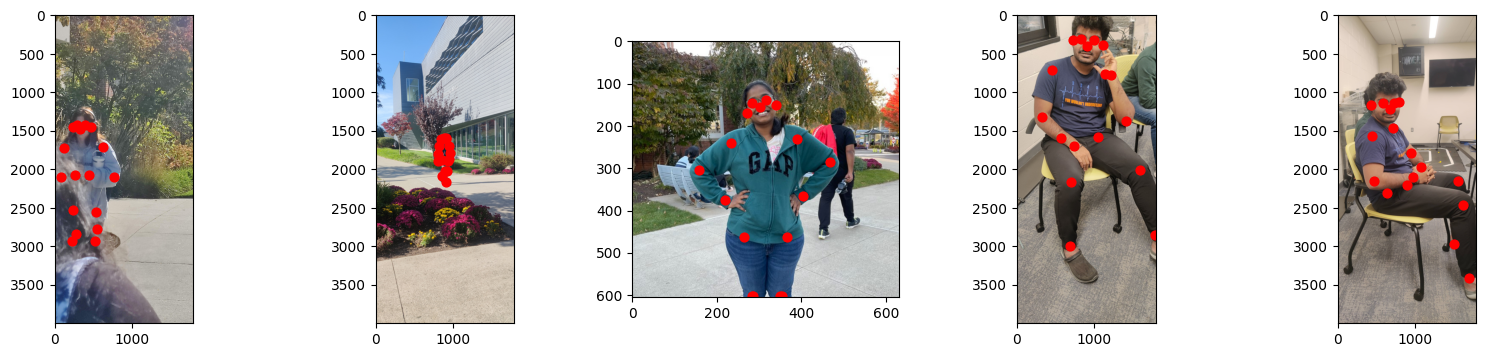

In [4]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import random

class PoseDataset(Dataset):
    def __init__(self, image_folder, annotation_file, transform=None):
        self.image_folder = image_folder
        with open(annotation_file, 'r') as f:
            data = json.load(f)
        self.images = {image['id']: image for image in data['images']}
        self.annotations = {anno['image_id']: anno for anno in data['annotations']}
        self.transform = transform
        self.ids = list(self.images.keys())

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        img_id = self.ids[idx]
        img_info = self.images[img_id]
        img_name = img_info['file_name']
        img_path = os.path.join(self.image_folder, img_name)
        image = Image.open(img_path).convert('RGB')
        keypoints = np.array(self.annotations[img_id]['keypoints']).reshape(-1, 2)

        if self.transform:
            image = self.transform(image)

        keypoints_tensor = torch.tensor(keypoints, dtype=torch.float32)

        return image, keypoints_tensor


def plot_images(dataset, num_images=5):
    fig, axs = plt.subplots(1, num_images, figsize=(20, 4))
    for i in range(num_images):
        idx = random.randint(0, len(dataset) - 1)
        image, keypoints = dataset[idx]
        axs[i].imshow(image)
        axs[i].scatter(keypoints[:, 0], keypoints[:, 1], c='red', s=40)
    plt.show()

image_folder = "/content/drive/MyDrive/DL_Project/images"
annotation_file = "/content/drive/MyDrive/DL_Project/annotations_coco_format.json"
dataset = PoseDataset(image_folder, annotation_file)

plot_images(dataset)

In [5]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import models, transforms
from PIL import Image
import os
import json
import matplotlib.pyplot as plt
from torch import nn, optim
import itertools
import copy
import numpy as np
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

image_folder = '/content/drive/MyDrive/DL_Project/images'
annotation_file = '/content/drive/MyDrive/DL_Project/annotations_coco_format.json'

with open(annotation_file, 'r') as f:
    annotations = json.load(f)
num_keypoints = len(annotations['annotations'][0]['keypoints']) // 2

class PoseDataset(Dataset):
    def __init__(self, image_folder, annotation_file, transform=None):
        self.image_folder = image_folder
        with open(annotation_file, 'r') as f:
            data = json.load(f)
        self.images = {image['id']: image for image in data['images']}
        self.annotations = {anno['image_id']: anno for anno in data['annotations']}
        self.transform = transform
        self.ids = list(self.images.keys())

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        img_id = self.ids[idx]
        img_info = self.images[img_id]
        img_name = img_info['file_name']
        img_path = os.path.join(self.image_folder, img_name)
        image = Image.open(img_path).convert('RGB')

        image = image.resize((256, 256), Image.ANTIALIAS)

        keypoints = np.array(self.annotations[img_id]['keypoints']).reshape(-1, 2)

        if self.transform:
            image = self.transform(image)
        keypoints_tensor = torch.tensor(keypoints, dtype=torch.float32)

        return image, keypoints_tensor

    def find_id_by_filename(self, filename):
        for img_id, img_info in self.images.items():
            if img_info['file_name'] == filename:
                return img_id
        return None

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

setup_logger()
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

def get_data_loader(image_folder, annotation_file, batch_size=8, split_ratio=(0.8, 0.1, 0.1)):
    full_dataset = PoseDataset(image_folder, annotation_file, transform=data_transforms['train'])

    train_size = int(split_ratio[0] * len(full_dataset))
    val_size = int(split_ratio[1] * len(full_dataset))
    test_size = len(full_dataset) - train_size - val_size

    dataset_train, dataset_val, dataset_test = random_split(full_dataset, [train_size, val_size, test_size])

    train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader






model_final_a6e10b.pkl: 237MB [00:18, 12.7MB/s]                           


In [6]:
model = models.resnet50(pretrained=True)

def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight.data)
        nn.init.constant_(m.bias.data, 0)

num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, num_keypoints * 2)
)

model.fc.apply(initialize_weights)

model.to(device)

criterion = nn.MSELoss()

def overfit_small_dataset(model, criterion, optimizer, dataloader):
    for epoch in tqdm(range(300)):
        for images, keypoints in dataloader:
            images, keypoints = images.to(device), keypoints.view(keypoints.size(0), -1).to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, keypoints)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

def train_model(model, criterion, optimizer, dataloader, num_epochs=1, phase='train'):
    if phase == 'train':
        model.train()
    else:
        model.eval()

    losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (images, keypoints) in enumerate(tqdm(dataloader)):
            images, keypoints = images.to(device), keypoints.view(keypoints.size(0), -1).to(device)
            optimizer.zero_grad()
            with torch.set_grad_enabled(phase == 'train'):
              outputs = model(images)
              loss = criterion(outputs, keypoints)
              if phase == 'train':
                if i == 0:
                    image = images[0].cpu().detach()
                    image = image.permute(1, 2, 0)
                    image = image.numpy()
                    image = np.clip(image, 0, 1)
                    kp = keypoints[0].cpu().detach().view(-1, 2).numpy() * 256

                    plt.figure(figsize=(5, 5))
                    plt.imshow(image)
                    plt.title(f'Train Batch First Image - Epoch {epoch}')
                    plt.axis('off')
                    plt.show()

                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(dataloader)
        losses.append(epoch_loss)
        print(f"{phase.title()} Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")
    return losses

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 56.6MB/s]


<ipython-input-5-21936ed44b95>:43: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((256, 256), Image.ANTIALIAS)
  0%|          | 0/20 [00:00<?, ?it/s]

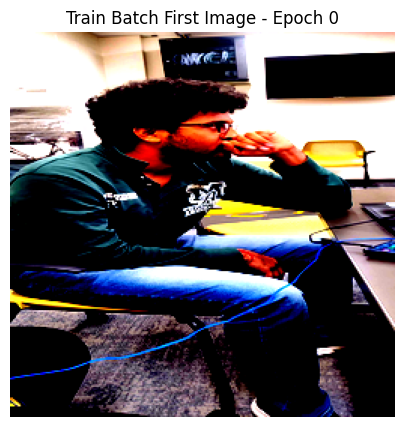

100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


Train Epoch 1/10, Loss: 1613825.9375


  0%|          | 0/20 [00:00<?, ?it/s]

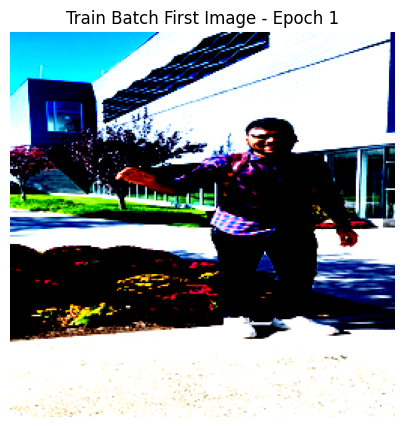

100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


Train Epoch 2/10, Loss: 1609151.6719


  0%|          | 0/20 [00:00<?, ?it/s]

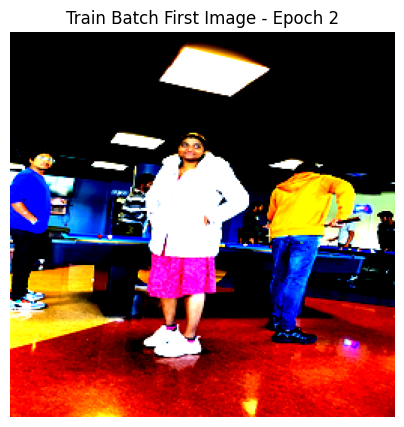

100%|██████████| 20/20 [00:22<00:00,  1.11s/it]


Train Epoch 3/10, Loss: 1597610.9219


  0%|          | 0/20 [00:00<?, ?it/s]

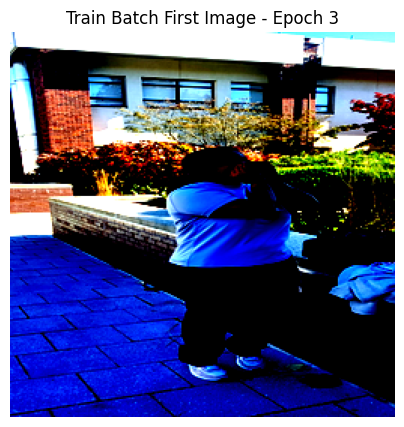

100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


Train Epoch 4/10, Loss: 1593025.1687


  0%|          | 0/20 [00:00<?, ?it/s]

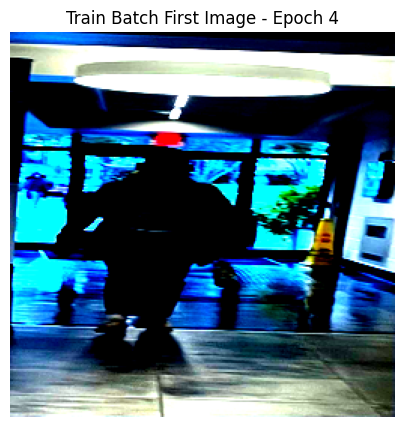

100%|██████████| 20/20 [00:23<00:00,  1.15s/it]


Train Epoch 5/10, Loss: 1585129.5813


  0%|          | 0/20 [00:00<?, ?it/s]

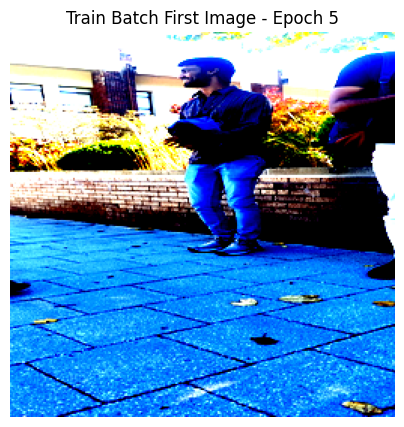

100%|██████████| 20/20 [00:23<00:00,  1.15s/it]


Train Epoch 6/10, Loss: 1580939.2844


  0%|          | 0/20 [00:00<?, ?it/s]

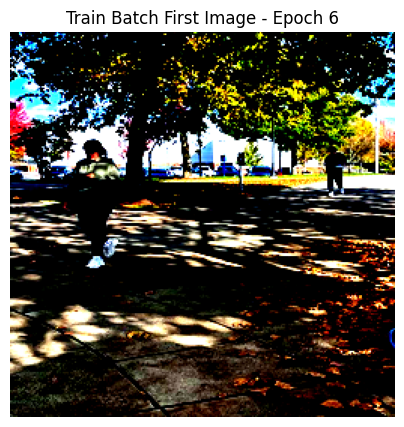

100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


Train Epoch 7/10, Loss: 1569526.5063


  0%|          | 0/20 [00:00<?, ?it/s]

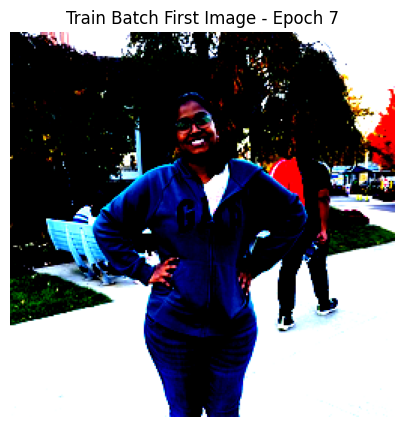

100%|██████████| 20/20 [00:22<00:00,  1.10s/it]


Train Epoch 8/10, Loss: 1566192.0000


  0%|          | 0/20 [00:00<?, ?it/s]

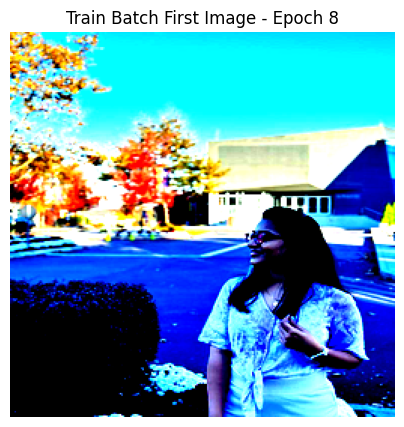

100%|██████████| 20/20 [00:24<00:00,  1.20s/it]


Train Epoch 9/10, Loss: 1559964.7078


  0%|          | 0/20 [00:00<?, ?it/s]

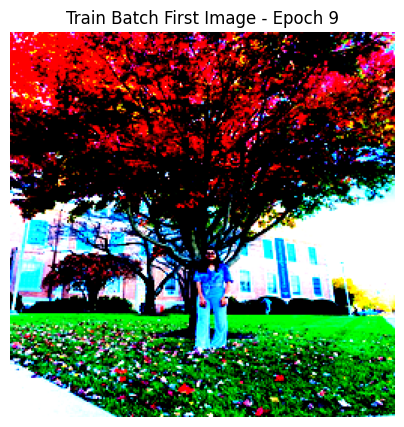

100%|██████████| 20/20 [00:23<00:00,  1.15s/it]


Train Epoch 10/10, Loss: 1544575.7609


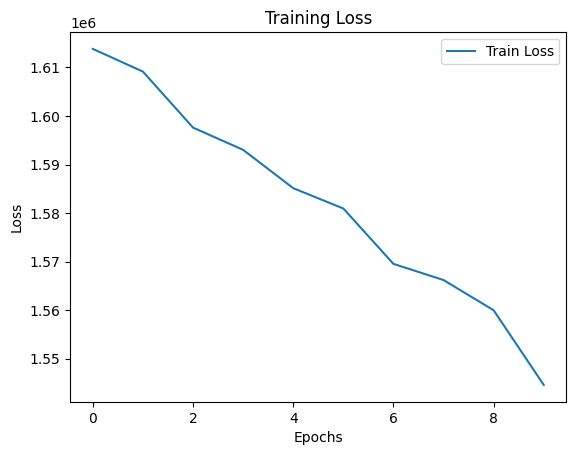


Training with lr=0.0001, momentum=0.7


100%|██████████| 3/3 [00:02<00:00,  1.06it/s]


Val Epoch 1/1, Loss: 1635067.7292

Training with lr=0.0001, momentum=0.8


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Val Epoch 1/1, Loss: 1635067.7292

Training with lr=0.0001, momentum=0.9


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Val Epoch 1/1, Loss: 1635067.7292

Training with lr=0.001, momentum=0.7


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


Val Epoch 1/1, Loss: 1635067.7292

Training with lr=0.001, momentum=0.8


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Val Epoch 1/1, Loss: 1635067.7292

Training with lr=0.001, momentum=0.9


100%|██████████| 3/3 [00:02<00:00,  1.01it/s]


Val Epoch 1/1, Loss: 1635067.7292

Training with lr=0.01, momentum=0.7


100%|██████████| 3/3 [00:02<00:00,  1.01it/s]


Val Epoch 1/1, Loss: 1635067.7292

Training with lr=0.01, momentum=0.8


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


Val Epoch 1/1, Loss: 1635067.7292

Training with lr=0.01, momentum=0.9


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Val Epoch 1/1, Loss: 1635067.7292

Best Hyperparameters: {'lr': 0.0001, 'momentum': 0.7}


100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

Test Epoch 1/1, Loss: 1738143.2083

Final Test Loss: 1738143.2083333333


In [8]:
train_loader, val_loader, test_loader = get_data_loader(image_folder, annotation_file)

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

small_loader, _, _ = get_data_loader(image_folder, annotation_file)
small_batch = next(iter(small_loader))
overfit_small_dataset(model, criterion, optimizer, [small_batch])
train_losses = train_model(model, criterion, optimizer, train_loader, num_epochs=10, phase='train')

plt.plot(train_losses, label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

learning_rates = [1e-4, 1e-3, 1e-2]
momentums = [0.7, 0.8, 0.9]
best_val_loss = float('inf')
best_hyperparams = {}
best_model_wts = copy.deepcopy(model.state_dict())

for lr, momentum in itertools.product(learning_rates, momentums):
    print(f"\nTraining with lr={lr}, momentum={momentum}")
    model.load_state_dict(best_model_wts)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    val_losses = train_model(model, criterion, optimizer, val_loader, num_epochs=1, phase='val')

    # plt.plot(val_losses, label=f'lr={lr}, momentum={momentum}')

    if min(val_losses) < best_val_loss:
        best_val_loss = min(val_losses)
        best_hyperparams = {'lr': lr, 'momentum': momentum}
        best_model_wts = copy.deepcopy(model.state_dict())

print("\nBest Hyperparameters:", best_hyperparams)

model.load_state_dict(best_model_wts)
test_loss = train_model(model, criterion, optimizer, test_loader, num_epochs=1, phase='test')[0]
print(f"\nFinal Test Loss: {test_loss}")

In [21]:
from torch.utils.data import DataLoader, Subset
class KeypointModel(nn.Module):
    def __init__(self, num_keypoints):
        super(KeypointModel, self).__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 256 * 3, 1024),  # Adjusted to flatten the 256x256x3 input
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_keypoints * 2)
        )

    def forward(self, x):
        return self.network(x)

def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight.data)
        nn.init.constant_(m.bias.data, 0)

# Initialize the model
model = KeypointModel(num_keypoints)
model.apply(initialize_weights)
model.to(device)

criterion = nn.MSELoss()

def overfit_single_sample(model, criterion, optimizer, dataset):

    single_sample = Subset(dataset, [0])

    single_sample_loader = DataLoader(single_sample, batch_size=1)

    for epoch in range(3):
        for images, keypoints in single_sample_loader:
            images, keypoints = images.to(device), keypoints.view(keypoints.size(0), -1).to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, keypoints)

            predicted_keypoints = outputs.view(-1, num_keypoints, 2)
            ground_truth_keypoints = keypoints.view(-1, num_keypoints, 2)
            dist = torch.norm(predicted_keypoints - ground_truth_keypoints, dim=2)

            accuracy = torch.mean((dist < 3000).float())

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Accuracy: {accuracy.item() * 100:.2f}%")

full_dataset = PoseDataset(image_folder, annotation_file, transform=data_transforms['train'])

overfit_single_sample(model, criterion, optimizer, full_dataset)

<ipython-input-5-21936ed44b95>:43: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((256, 256), Image.ANTIALIAS)


Epoch 1, Loss: 1377182.8750, Accuracy: 100.00%
Epoch 2, Loss: 1376620.0000, Accuracy: 100.00%
Epoch 3, Loss: 1377711.2500, Accuracy: 100.00%


In [22]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.8/304.8 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 10.2 M

In [ ]:
import gradio as gr
import numpy as np

setup_logger()
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

def estimate_pose(image):
    # Convert PIL Image to NumPy array if it's not already
    if not isinstance(image, np.ndarray):
        image = np.array(image)

    outputs = predictor(image)
    # Create a visualizer to draw the predictions on the image
    v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    return out.get_image()[:, :, ::-1]

def process_and_display(image):
    # Convert PIL Image to NumPy array for processing
    image_np = np.array(image)
    # Estimate the pose
    output_image = estimate_pose(image_np)
    return output_image

iface = gr.Interface(
    fn=process_and_display,
    inputs=gr.Image(type='pil', label="Upload Image"),
    outputs=gr.Image(type='pil', label="Image with Pose Estimation"),
    title="Pose Estimation Model",
    description="Upload an image, and the model will output the image with pose estimations."
)

iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://841229f3abe047d920.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
